In [1]:
import numpy as np
import multiprocessing as mp
from tqdm import tqdm

print("Number of processors: ", mp.cpu_count())
stat_cycle_num =  30

Number of processors:  12


In [2]:
import sympy as sp
from xSigmoid import *

sp.init_printing()

system.equations

c:\python\lib\site-packages\qbee\quadratization.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
def get_steps(func):
    total_steps = list()
    for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
        with mp.Pool(mp.cpu_count()) as pool:
            steps_cur = pool.map(func, range(10))
            total_steps += steps_cur
    return total_steps

def print_statistics(steps):
    print(f"Range: [{np.min(steps)}, {np.max(steps)}]")
    print("Mean: ", np.mean(steps))
    print("Median: ", np.median(steps))
    print("Standard deviation: ", np.std(steps))

### ID-DFS with "Random" heuristics

In [4]:
iddfs_random = get_steps(quad_iddfs_random)

print("Random ID-DFS steps statistics:")
print_statistics(iddfs_random)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:45<00:00, 19.51s/run]


Random ID-DFS steps statistics:
Range: [13, 160]
Mean:  65.54666666666667
Median:  57.5
Standard deviation:  42.71698907408568


### ID-DFS with "Frequent-first (FF)" heuristics

In [5]:
iddfs_frequent_first = get_steps(quad_iddfs_frequent_first)

print("Frequent-first ID-DFS from 2 depth - steps statistics:")
print_statistics(iddfs_frequent_first)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:55<00:00, 19.84s/run]


Frequent-first ID-DFS from 2 depth - steps statistics:
Range: [13, 154]
Mean:  64.74666666666667
Median:  57.5
Standard deviation:  39.1107294173294


### ID-DFS with "Free-variables-count (FVC)" heuristics

In [6]:
iddfs_free_variables_count = get_steps(quad_iddfs_free_variables_count)

print("Free-variables-count ID-DFS steps statistics:")
print_statistics(iddfs_free_variables_count)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:59<00:00, 19.97s/run]


Free-variables-count ID-DFS steps statistics:
Range: [70, 156]
Mean:  113.77
Median:  114.5
Standard deviation:  30.267206125882627


### ID-DFS with "Auxiliary-equation-degree (AED)" heuristics

In [7]:
iddfs_auxiliary_equation_degree = get_steps(quad_iddfs_auxiliary_equation_degree)

print("Auxiliary-equation-degree ID-DFS steps statistics:")
print_statistics(iddfs_auxiliary_equation_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:58<00:00, 19.96s/run]


Auxiliary-equation-degree ID-DFS steps statistics:
Range: [20, 160]
Mean:  66.92
Median:  62.0
Standard deviation:  37.59149194520838


### ID-DFS with "Auxiliary-equation-quadratic-discrepancy (AEQD)" heuristics

In [8]:
iddfs_auxiliary_equation_quadratic_discrepancy = get_steps(quad_iddfs_auxiliary_equation_quadratic_discrepancy)

print("Auxiliary-equation-quadratic-discrepancy ID-DFS steps statistics:")
print_statistics(iddfs_auxiliary_equation_quadratic_discrepancy)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [10:03<00:00, 20.13s/run]


Auxiliary-equation-quadratic-discrepancy ID-DFS steps statistics:
Range: [44, 75]
Mean:  59.5
Median:  59.5
Standard deviation:  15.5


### ID-DFS with "Summary-monomial-degree (SMD)" heuristics

In [9]:
iddfs_summary_monomial_degree = get_steps(quad_iddfs_summary_monomial_degree)

print("Summary-monomial-degree ID-DFS steps statistics:")
print_statistics(iddfs_summary_monomial_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [11:01<00:00, 22.06s/run]


Summary-monomial-degree ID-DFS steps statistics:
Range: [18, 83]
Mean:  40.31666666666667
Median:  50.0
Standard deviation:  22.48828707473194


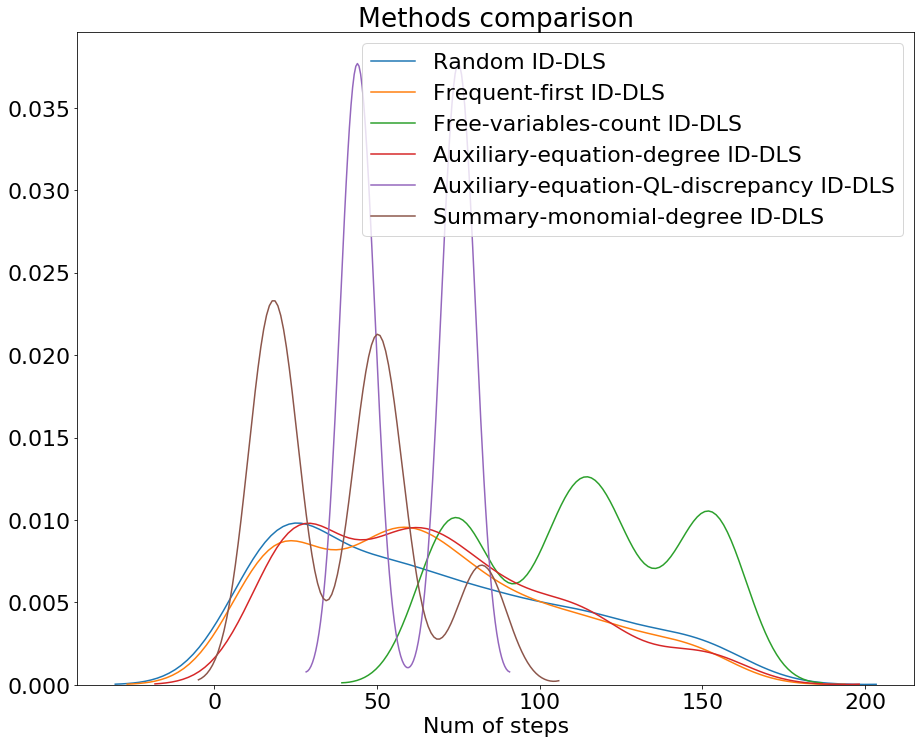

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(iddfs_random, label="Random ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_frequent_first, label="FF ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_free_variables_count, label="FVC ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_auxiliary_equation_degree, label="AED ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_auxiliary_equation_quadratic_discrepancy, label="AEQD ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_summary_monomial_degree, label="SMD ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlabel("Num of steps")
plt.title("Methods comparison");

AEQD and SMD are performing best, so let's plot them distinctly.

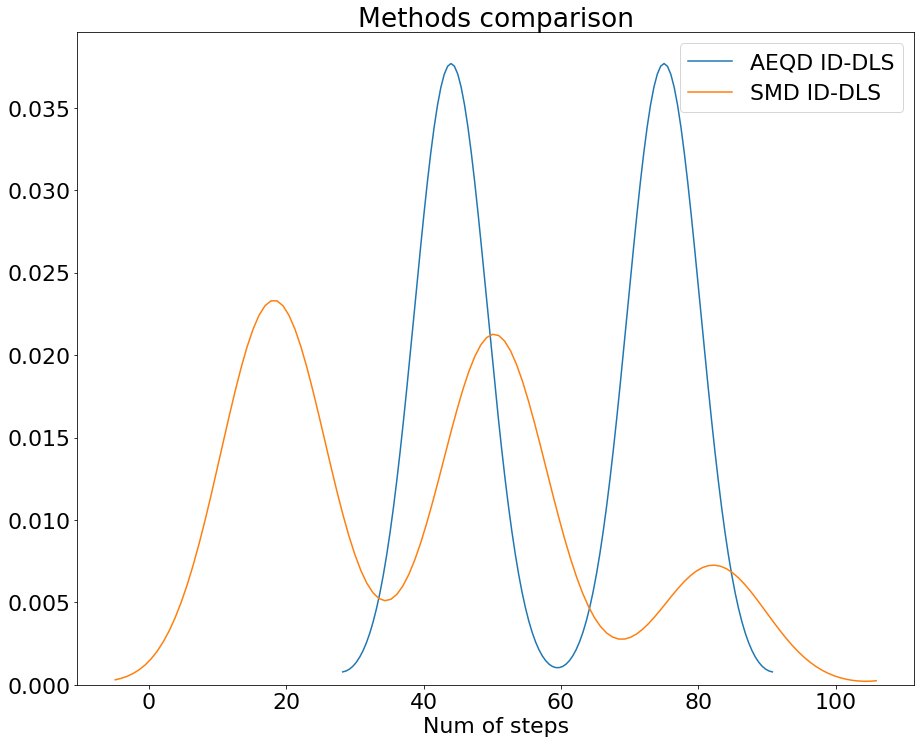

In [13]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(iddfs_auxiliary_equation_quadratic_discrepancy, label="AEQD ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_summary_monomial_degree, label="SMD ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlabel("Num of steps")
plt.title("Methods comparison");


In [14]:
import pandas as pd

def flatten(lst):
    return [item for sublist in lst for item in sublist]

steps_df = pd.DataFrame({
    'steps': iddfs_random + iddfs_frequent_first + iddfs_free_variables_count + iddfs_auxiliary_equation_degree + iddfs_auxiliary_equation_quadratic_discrepancy + iddfs_summary_monomial_degree,
    'method': flatten([[method]*len(iddfs_random) for method in ["Random", "FF", "FVC", "AED", "AEQD", "SMD"]])
})

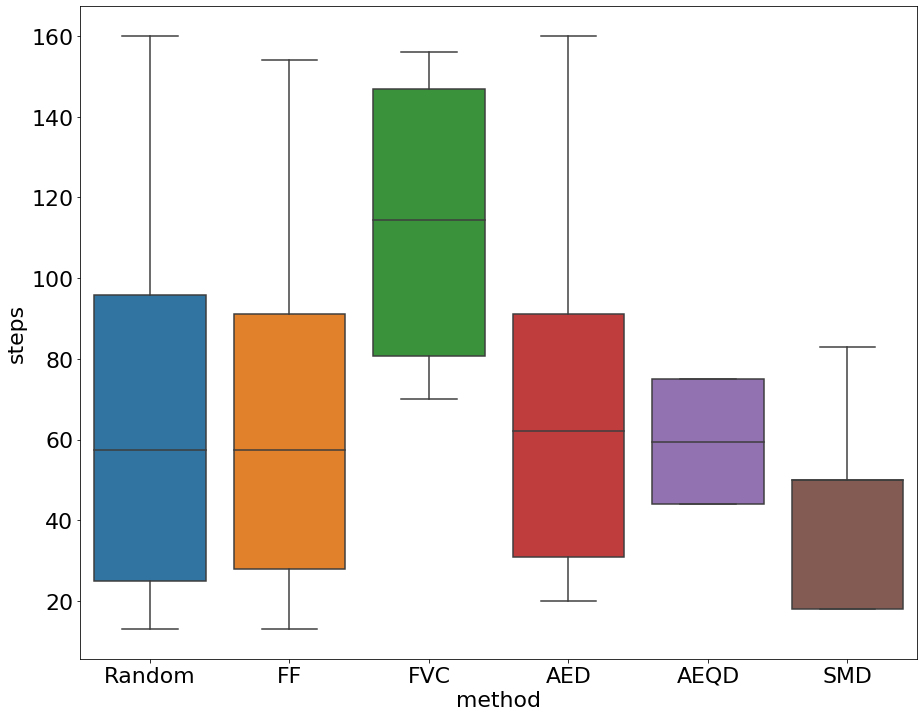

In [15]:
plt.figure(figsize=(15, 12))
sns.boxplot('method', 'steps', data=steps_df)

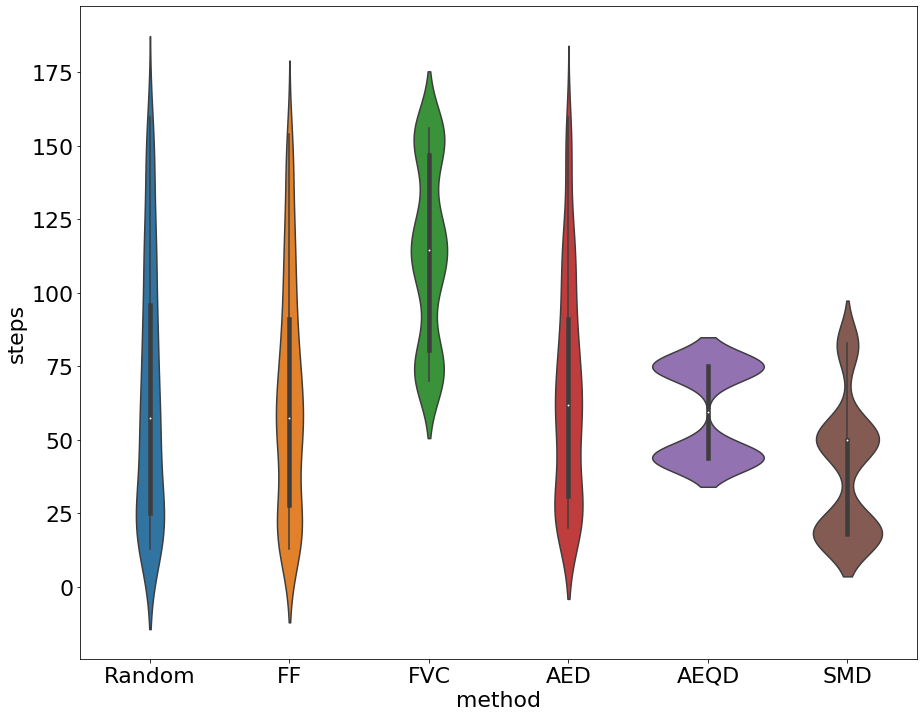

In [16]:
plt.figure(figsize=(15, 12))
sns.violinplot('method', 'steps', data=steps_df)